# IRIS FLOWER CLASSIFICATION MODEL 
### Gunjan Kumar
Predict iris species from sepal and petal measurements with RandomForestClassifier model.

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## LOADING DATASET

In [2]:
df=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv", encoding='latin-1')

## READING DATASET

### PRELIMINARY INFORMATION

In [3]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### VISUALIZING DATASET

+ PAIR PLOT 

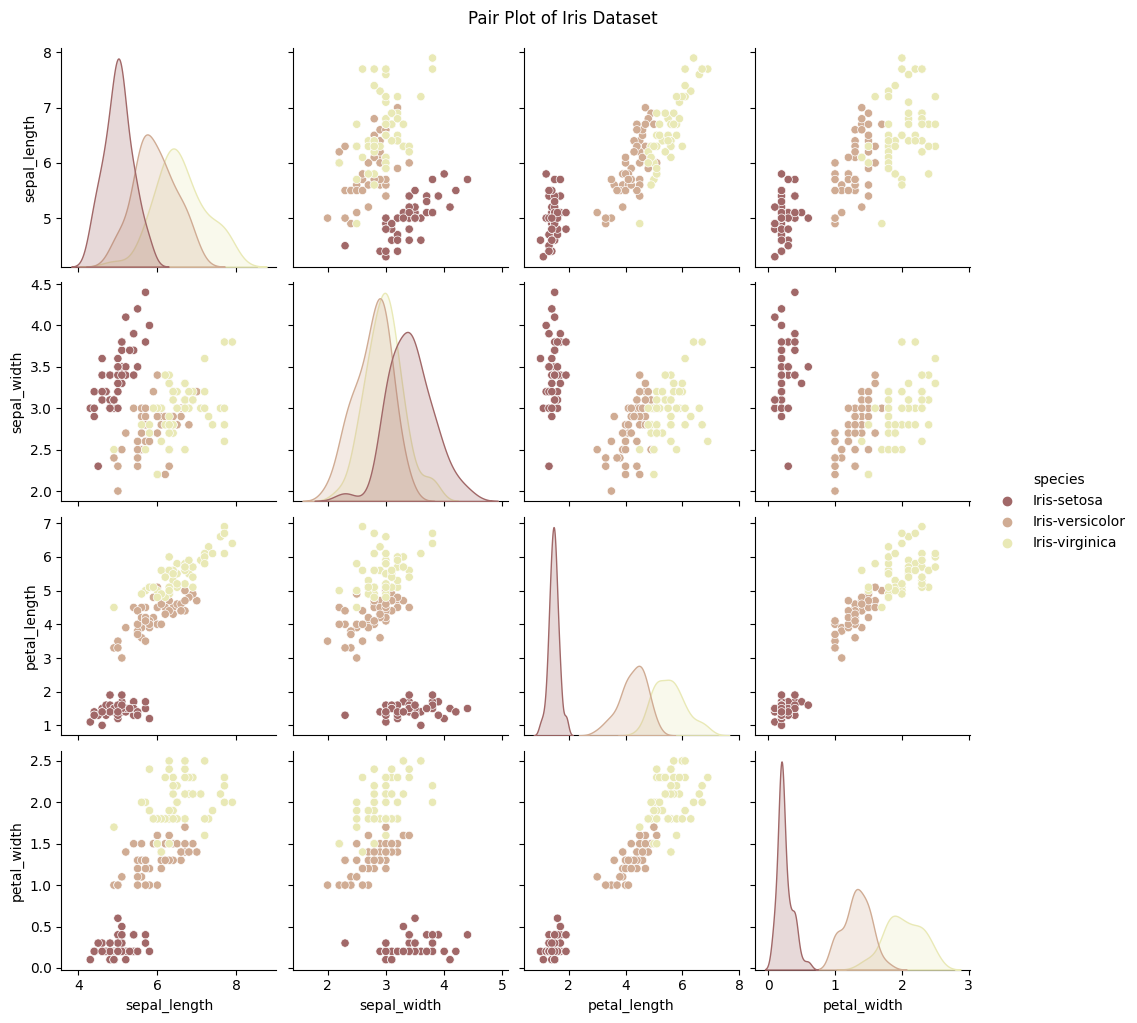

In [4]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
pair_plot = sns.pairplot(df, hue="species", diag_kind="auto", palette='pink')
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

+ BOXPLOT OF COLUMNS

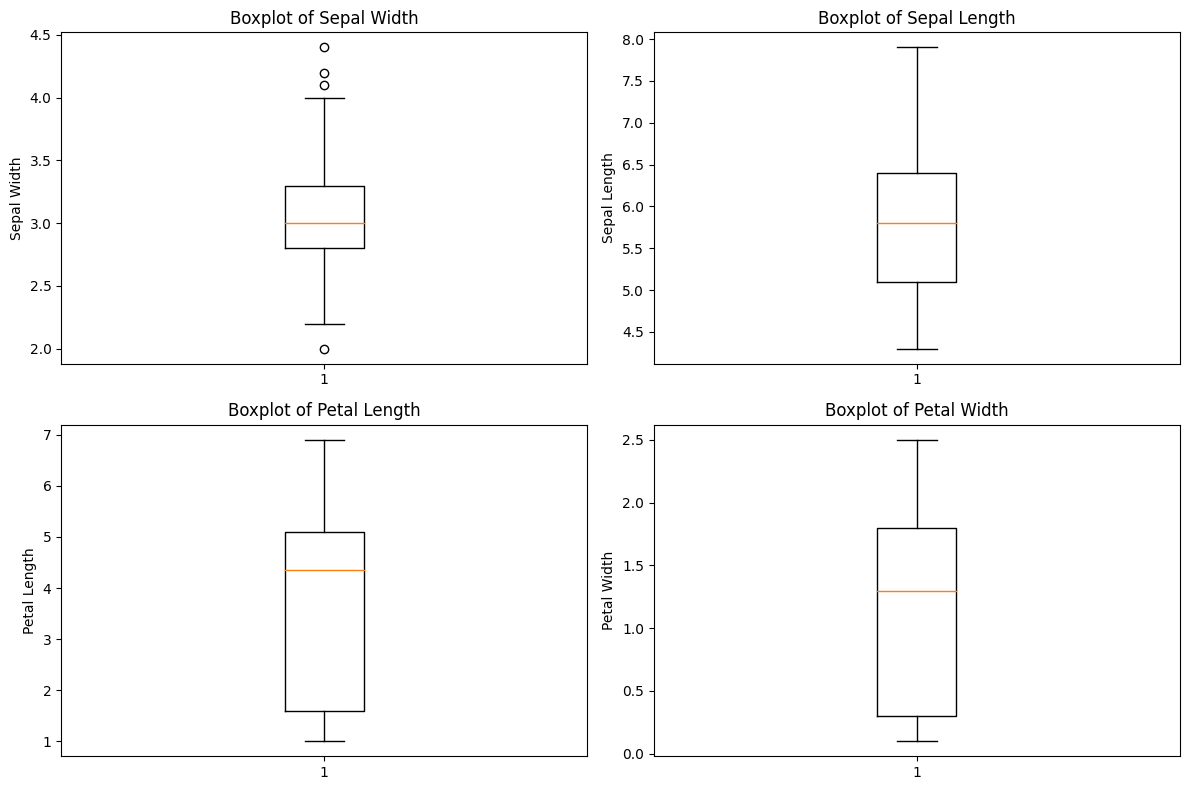

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.boxplot(df['sepal_width'])
plt.title('Boxplot of Sepal Width')
plt.ylabel('Sepal Width')

plt.subplot(2, 2, 2)
plt.boxplot(df['sepal_length'])
plt.title('Boxplot of Sepal Length')
plt.ylabel('Sepal Length')

plt.subplot(2, 2, 3)
plt.boxplot(df['petal_length'])
plt.title('Boxplot of Petal Length')
plt.ylabel('Petal Length')

plt.subplot(2, 2, 4)
plt.boxplot(df['petal_width'])
plt.title('Boxplot of Petal Width')
plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

## FEATURE SELECTION

<Axes: >

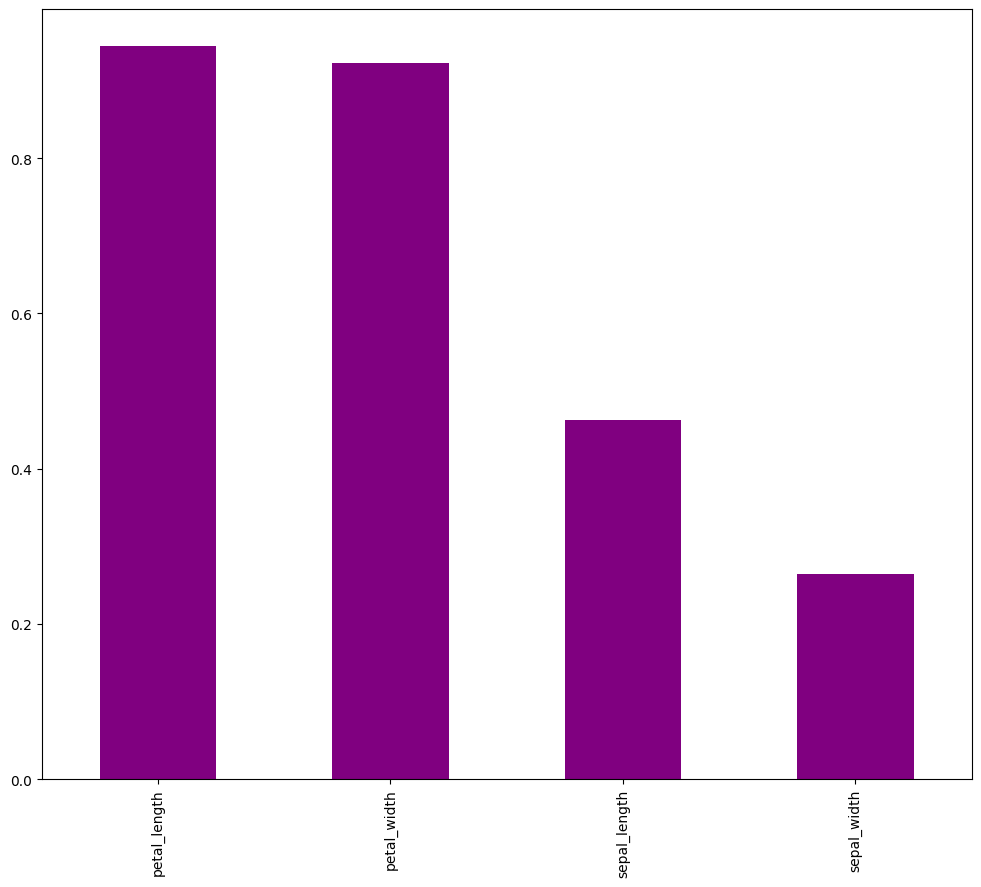

In [6]:
#SELECT KBEST FEATURES METHOD
X1=df.drop(columns='species',axis=1)
Y1=df['species']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3)
mutual_info=mutual_info_classif(X1_train,Y1_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X1_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,10),color='purple')


In [7]:
from sklearn.feature_selection import SelectKBest
cols=SelectKBest(mutual_info_classif,k=3)
cols.fit(X1_train,Y1_train)
X1_train.columns[cols.get_support()]

Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')

## ENCODING 'SPECIES' COLUMN

In [8]:
encode=LabelEncoder()
df['species']=encode.fit_transform(df['species'])


## SELECTING BEST FEATURES

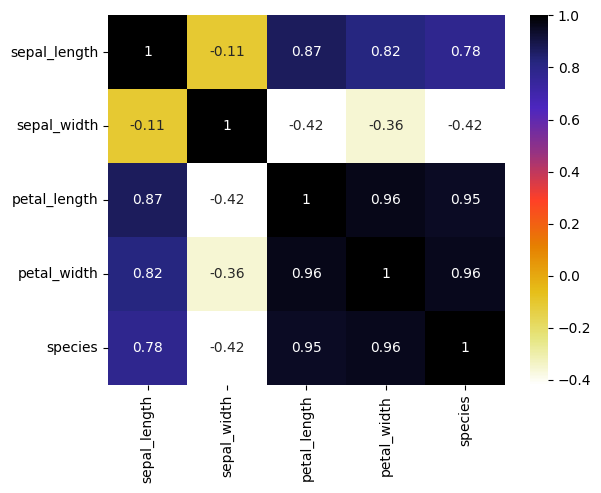

In [9]:
cor=df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
x_selected=df[['sepal_length','petal_width']]
y_target=df['species']
x_train,x_test,y_train,y_test=train_test_split(x_selected,y_target,test_size=0.3)

## APPLYING RANDOM FOREST CLASSIFIER METHOD

### TUNING THE PARAMETERS 
USING BEST PARAMATERS TO MAKE PREDICTION

In [11]:
param_grid = {
    'n_estimators': [10,20,40,60,80,100],
    'min_samples_split': [3,5,7,9],
    'max_features': ['sqrt','log2'],
    'max_depth': [3,5,7,9],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,error_score='raise')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

rf_best = grid_search.best_estimator_

y_pred = rf_best.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy, 2)}')
print('Classification Report:')
print(class_report)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 60}
Best Cross-Validation Score: 0.9523809523809523
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### PLOTTING THE CONFUSION MATRIX

Text(0.5, 1.0, 'Confusion Matrix')

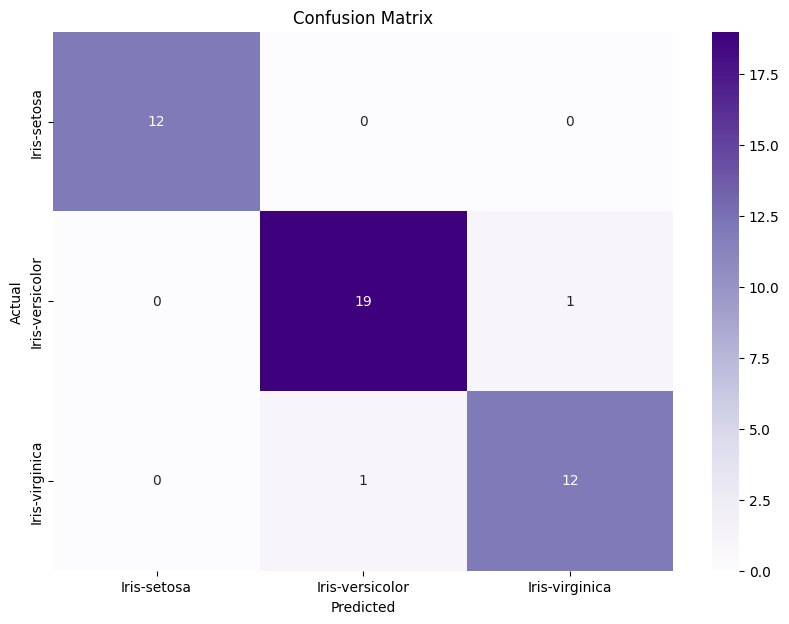

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

### MAKING PREDICTION FROM A NEW DATA 

In [13]:
pred_data = pd.DataFrame([[1.4, 1.2]], columns=x_selected.columns)

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message='.*does not have valid feature names.*')
    pred_new = rf_best.predict(pred_data)


if pred_new[0] == 0:
    print("Iris-setosa")
elif pred_new[0] == 1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-versicolor
